In [1]:
# import de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

/tmp/ipykernel_3514/2086825393.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### ✨ Funções de Filtragem dos Dados ✨

In [2]:
# função para verificar aqueles que possuem a tag de jogo com conteúdo sexual
def verificasexualcontent(x):
    if 'Sexual Content' in x or 'Nudity' in x:
        return 'Sim'
    else:
        return 'Não'

In [3]:
# função para verificar aqueles que são indie
def verificaindie(x):
    if 'Indie' in x:
        return 'Indie'
    else:
        return 'Grande Empresa'

In [4]:
# função para verificar aqueles que são hentai
def verificahentai(x):
    if 'Hentai' in x:
        return 'Sim'
    else:
        return 'Não'

In [5]:
def verificacategoria(x):
    if x['Indie'] == 'Indie' and x['ConteúdoSexual'] == 'Sim':
        return 'Indie com Conteúdo Sexual'
    elif x['Indie'] == 'Indie' and x['ConteúdoSexual'] == 'Não':
        return 'Indie sem Conteúdo Sexual'
    elif x['Indie'] == 'Grande Empresa' and x['ConteúdoSexual'] == 'Sim':
        return 'Grande Empresa com Conteúdo Sexual'
    elif x['Indie'] == 'Grande Empresa' and x['ConteúdoSexual'] == 'Não':
        return 'Grande Empresa sem Conteúdo Sexual'

In [6]:
def convertecoluna(x, nome):
    return str(nome)

### ✨ Filtragem dos Dados entre Mais Jogados e Jogos da Categoria Feminina ✨

In [7]:
# importando base de dados geral
jogos = pd.read_csv('todosjogos.csv')
jogos = jogos.drop(['Unnamed: 0', 'appid', 'publisher', 'developer', 'score_rank', 'userscore', 'owners', 'average_forever', 'average_2weeks', 
                    'median_forever', 'median_2weeks', 'initialprice', 'discount', 'languages', 'price', 'ccu'], axis=1)
jogos = jogos.dropna()

In [8]:
# importando base de dados de jogos com protagonista feminina
jogosfemininos = pd.read_csv('jogosprotagonistafeminina.csv')
jogosfemininos = jogosfemininos.drop(['Unnamed: 0', 'appid', 'publisher', 'developer', 'score_rank', 'userscore', 'average_forever', 
                                      'average_2weeks', 'median_forever', 'median_2weeks', 'initialprice', 'price', 'ccu', 'discount'], axis=1)
jogosfemininos = jogosfemininos.dropna()

In [9]:
# unindo os dados iguais, para assim ter tags dos jogos com protagonista feminina
dados = pd.merge(jogos, jogosfemininos, how='inner', on='name')

# removendo e renomeando colunas
dados['Positiva'] = dados['positive_y']
dados['Negativa'] = dados['negative_y']
dados['IntervaloJogadores'] = dados['owners']
dados = dados.drop(['positive_x', 'positive_y', 'negative_x', 'negative_x', 'negative_y', 'owners'], axis=1)
dados = dados[dados['name'] != 'Wallpaper Engine']

### ✨ Transformações dos Dados ✨

In [10]:
# criando coluna de identificação daqueles que possuem conteúdos sexuais
dados['ConteúdoSexual'] = dados['tags'].apply(lambda x: verificasexualcontent(x))

# criando coluna de identificação daqueles que são hentai
dados['Hentai'] = dados['tags'].apply(lambda x: verificahentai(x))

# criando coluna de identificação daqueles que são indie
dados['Indie'] = dados['genre'].apply(lambda x: verificaindie(x))

# criando coluna que indica jogos que são indie, ou não, que tem conteúdo sexual, ou não
dados['Categoria'] = dados[['Indie', 'ConteúdoSexual']].apply(lambda x: verificacategoria(x), axis=1)

# calculando valores de avaliações
dados['TotalAvaliacoes'] = dados['Positiva'] + dados['Negativa']
dados['PorcentagemPositivas'] = (dados['Positiva']/dados['TotalAvaliacoes'])*100
dados['PorcentagemNegativas'] = (dados['Negativa']/dados['TotalAvaliacoes'])*100

dados = dados.drop(["tags"], axis=1)
dados

,name,genre,Positiva,Negativa,IntervaloJogadores,ConteúdoSexual,Hentai,Indie,Categoria,TotalAvaliacoes,PorcentagemPositivas,PorcentagemNegativas
0,Half-Life: Alyx,"Action, Adventure",85519,1409,"2,000,000 .. 5,000,000",Não,Não,Grande Empresa,Grande Empresa sem Conteúdo Sexual,86928,98.379118,1.620882
1,Alien: Isolation,Action,49832,3780,"2,000,000 .. 5,000,000",Não,Não,Grande Empresa,Grande Empresa sem Conteúdo Sexual,53612,92.949340,7.050660
2,Street Fighter V,Action,28670,14127,"2,000,000 .. 5,000,000",Sim,Não,Grande Empresa,Grande Empresa com Conteúdo Sexual,42797,66.990677,33.009323
3,FINAL FANTASY XII THE ZODIAC AGE,RPG,6632,724,"1,000,000 .. 2,000,000",Não,Não,Grande Empresa,Grande Empresa sem Conteúdo Sexual,7356,90.157694,9.842306
4,Finding Paradise,"Adventure, Indie, RPG",16256,347,"200,000 .. 500,000",Não,Não,Indie,Indie sem Conteúdo Sexual,16603,97.910016,2.089984
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Spiritfarer: Farewell Edition,"Adventure, Indie, Simulation",34943,1604,"1,000,000 .. 2,000,000",Não,Não,Indie,Indie sem Conteúdo Sexual,36547,95.611131,4.388869
211,Horizon Zero Dawn Complete Edition,"Action, Adventure, RPG",96674,13101,"1,000,000 .. 2,000,000",Não,Não,Grande Empresa,Grande Empresa sem Conteúdo Sexual,109775,88.065589,11.934411
213,Pit People,"Action, Indie, RPG, Strategy",7240,525,"200,000 .. 500,000",Não,Não,Indie,Indie sem Conteúdo Sexual,7765,93.238892,6.761108
214,Hellblade: Senua's Sacrifice,"Action, Adventure, Indie",57368,5891,"2,000,000 .. 5,000,000",Não,Não,Indie,Indie sem Conteúdo Sexual,63259,90.687491,9.312509


In [11]:
jogos['ConteúdoSexual'] = jogos['tags'].apply(lambda x: verificasexualcontent(x))
jogos['Indie'] = jogos['tags'].apply(lambda x: verificaindie(x))

In [12]:
# gerando dataframe com dummies das categorias
categorias = dados["genre"].str.get_dummies(sep=',')

In [13]:
# separando as categorias para gerar gráficos
acao = categorias[categorias["Action"] > 0]
acao['Action'] = acao['Action'].apply(lambda x: convertecoluna(x, 'Ação'))

aventura = categorias[categorias["Adventure"] > 0]
aventura['Adventure'] = aventura['Adventure'].apply(lambda x: convertecoluna(x, 'Aventura'))

aventura1 = categorias[categorias[" Adventure"] > 0]
aventura1[' Adventure'] = aventura[' Adventure'].apply(lambda x: convertecoluna(x, 'Aventura'))

casual = categorias[categorias["Casual"] > 0]
casual['Casual'] = casual['Casual'].apply(lambda x: convertecoluna(x, 'Casual'))

casual1 = categorias[categorias[" Casual"] > 0]
casual1[' Casual'] = casual1[' Casual'].apply(lambda x: convertecoluna(x, 'Casual'))

indie = categorias[categorias["Indie"] > 0]
indie['Indie'] = indie['Indie'].apply(lambda x: convertecoluna(x, 'Indie'))

indie1 = categorias[categorias[" Indie"] > 0]
indie1[' Indie'] = indie1[' Indie'].apply(lambda x: convertecoluna(x, 'Indie'))

rpg = categorias[categorias["RPG"] > 0]
rpg['RPG'] = rpg['RPG'].apply(lambda x: convertecoluna(x, 'RPG'))

rpg1 = categorias[categorias[" RPG"] > 0]
rpg1[' RPG'] = rpg1[' RPG'].apply(lambda x: convertecoluna(x, 'RPG'))

simulacao = categorias[categorias["Simulation"] > 0]
simulacao['Simulation'] = simulacao['Simulation'].apply(lambda x: convertecoluna(x, 'Simulação'))

simulacao1 = categorias[categorias[" Simulation"] > 0]
simulacao1[' Simulation'] = simulacao1[' Simulation'].apply(lambda x: convertecoluna(x, 'Simulação'))

esportes = categorias[categorias[" Sports"] > 0]
esportes[' Sports'] = esportes[' Sports'].apply(lambda x: convertecoluna(x, 'Esportes'))

estrategia = categorias[categorias[" Strategy"] > 0]
estrategia[' Strategy'] = esportes[' Strategy'].apply(lambda x: convertecoluna(x, 'Estratégia'))

### ✨ Análise dos Dados ✨

**✨Características dos Jogos de Protagonista Feminina**

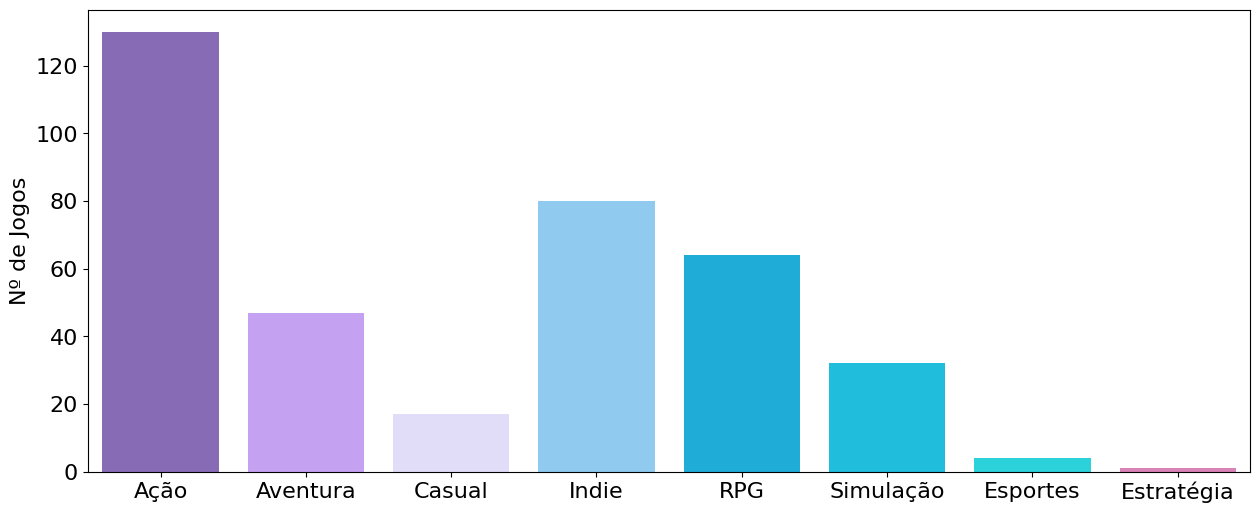

In [14]:
# definição da paleta de cores para gráficos
sns.set_palette(['#845EC2', '#C493FF', '#C493FF', '#ded8fc', '#ded8fc', '#80CEFF', '#80CEFF', '#00BCF6', '#00BCF6', '#00D2FC', 
                 '#00D2FC', '#0FECF6', '#E773BA'])
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 16})
# sns.set_palette(['#E773BA', '#C6A1FF', '#00BCF6', '#0FECF6'])

# gráfico
sns.countplot(data=acao, x="Action").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=aventura, x="Adventure").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=aventura1, x=" Adventure").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=casual, x="Casual").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=casual1, x=" Casual").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=indie, x="Indie").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=indie1, x=" Indie").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=rpg, x="RPG").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=rpg1, x=" RPG").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=simulacao, x="Simulation").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=simulacao1, x=" Simulation").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=esportes, x=" Sports").set(xlabel='', ylabel='Nº de Jogos')
sns.countplot(data=estrategia, x=" Strategy").set(xlabel='', ylabel='Nº de Jogos')

plt.savefig('categoriasjogos.pdf', dpi=300, bbox_inches='tight')

In [15]:
print('Jogos de Ação: ' + str(acao.shape[0]))
print('Jogos de Aventura: ' + str(aventura.shape[0]))
print('Jogos de Indie: ' + str(indie.shape[0] + indie1.shape[0]))
print('Jogos de RPG: ' + str(rpg.shape[0] + rpg1.shape[0]))

Jogos de Ação: 130
Jogos de Aventura: 47
Jogos de Indie: 86
Jogos de RPG: 79


**✨(1) A Quantidade de Jogos com Conteúdo Sexual na Categoria de Protagonista Feminina é Relevante?**

In [16]:
print('Número de Jogos com Conteúdo Sexual em Protagonista Feminina: ' + str(dados[dados['ConteúdoSexual'] == 'Sim'].shape[0]))
print('Número de Jogos com Conteúdo Sexual em Mais Votados: ' + str(jogos[jogos['ConteúdoSexual'] == 'Sim'].shape[0]))

Número de Jogos com Conteúdo Sexual em Protagonista Feminina: 37
Número de Jogos com Conteúdo Sexual em Mais Votados: 124


**✨(2) Dos Jogos desenvolvidos na Categoria de Protagonista Feminina, Quantos são Desenvolvidos por Grandes Empresas? E Quantos são Desenvolvidos por Empresas Indie?**

In [17]:
print('Desenvolvido por Empresa Indie: ' + str(dados[dados['Indie'] == 'Indie'].shape[0]))
print('Desenvolvido por Grande Empresa: ' + str(dados[dados['Indie'] == 'Grande Empresa'].shape[0]))

Desenvolvido por Empresa Indie: 86
Desenvolvido por Grande Empresa: 129


**✨(3) Qual Tipo de Empresa Desenvolve um Maior Número de Jogos com Conteúdo Sexual na Categoria de Protagonista Feminina?**

In [18]:
conteudosexualizado = dados[dados['ConteúdoSexual'] == 'Sim']
print('Desenvolvido por Empresa Indie: ' + str(conteudosexualizado[conteudosexualizado['Indie'] == 'Indie'].shape[0]))
print('Desenvolvido por Grande Empresa: ' + str(conteudosexualizado[conteudosexualizado['Indie'] == 'Grande Empresa'].shape[0]))

Desenvolvido por Empresa Indie: 8
Desenvolvido por Grande Empresa: 29


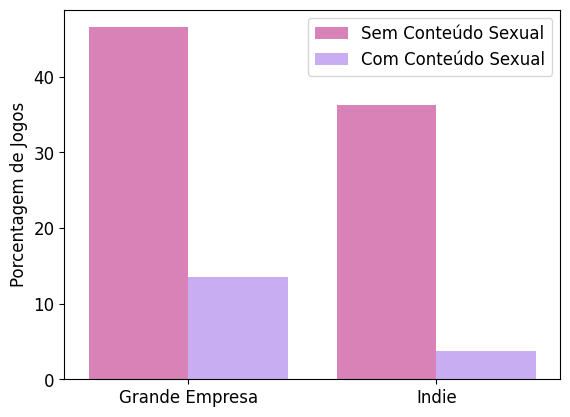

In [19]:
sns.set_palette(['#E773BA', '#C6A1FF', '#00BCF6', '#0FECF6'])
plt.rcParams.update({'font.size': 12})
sns.countplot(data=dados, x="Indie", hue='ConteúdoSexual', stat='percent').set(xlabel='', ylabel='Porcentagem de Jogos')
plt.legend(['Sem Conteúdo Sexual', 'Com Conteúdo Sexual'])
plt.savefig('conteudosexualporempresa.pdf', dpi=300, bbox_inches='tight')

In [20]:
conteudohentai = dados[dados['Hentai'] == 'Sim']
print('Desenvolvido por Empresa Indie: ' + str(conteudohentai[conteudohentai['Indie'] == 'Indie'].shape[0]))
print('Desenvolvido por Grande Empresa: ' + str(conteudohentai[conteudohentai['Indie'] == 'Grande Empresa'].shape[0]))
conteudohentai.loc[conteudohentai['Hentai'] == "Sim", 'Hentai'] = 'Jogo Hentai'

Desenvolvido por Empresa Indie: 2
Desenvolvido por Grande Empresa: 1


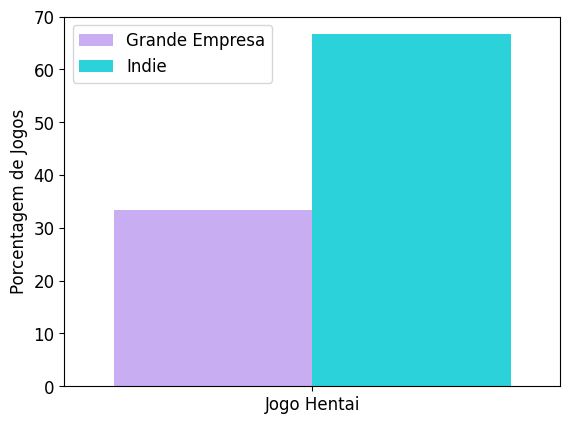

In [21]:
sns.set_palette(['#C6A1FF', '#0FECF6'])
plt.rcParams.update({'font.size': 12})
sns.countplot(data=conteudohentai, x="Hentai", hue='Indie', stat='percent').set(xlabel='', ylabel='Porcentagem de Jogos')
plt.legend(['Grande Empresa', 'Indie'])
plt.savefig('jogoshentai.pdf', dpi=300, bbox_inches='tight')

**✨(4) Os Jogos com Conteúdo Sexual são Mais Populares do que os sem?**

In [22]:
semindie = dados[dados['Categoria'] == 'Indie sem Conteúdo Sexual']
comindie = dados[dados['Categoria'] == 'Indie com Conteúdo Sexual']
semnaoindie = dados[dados['Categoria'] == 'Grande Empresa com Conteúdo Sexual']
comnaoindie = dados[dados['Categoria'] == 'Grande Empresa sem Conteúdo Sexual']

semindie = semindie.groupby('IntervaloJogadores').count()
comindie = comindie.groupby('IntervaloJogadores').count()
semnaoindie = semnaoindie.groupby('IntervaloJogadores').count()
comnaoindie= comnaoindie.groupby('IntervaloJogadores').count()

In [23]:
dadoscategorias = pd.DataFrame()
indices = ['0 .. 20,000', '20,000 .. 50,000', '50,000 .. 100,000', '100,000 .. 200,000', '500,000 .. 1,000,000', '1,000,000 .. 2,000,000',
          '2,000,000 .. 5,000,000', '10,000,000 .. 20,000,000', '20,000,000 .. 50,000,000']
dadoscategorias['IntervaloJogadores'] = indices
dadoscategorias = dadoscategorias.set_index('IntervaloJogadores')
dadoscategorias['Grande Empresa sem Conteúdo Sexual'] = semnaoindie['name']
dadoscategorias['Grande Empresa com Conteúdo Sexual'] = comnaoindie['name']
dadoscategorias['Indie sem Conteúdo Sexual'] = semindie['name']
dadoscategorias['Indie com Conteúdo Sexual'] = comindie['name']
dadoscategorias = dadoscategorias.fillna(0)

In [24]:
dadoscategorias['Grande Empresa sem Conteúdo Sexual'] = (dadoscategorias['Grande Empresa sem Conteúdo Sexual']/semnaoindie['name'].sum())*100
dadoscategorias['Grande Empresa com Conteúdo Sexual'] = (dadoscategorias['Grande Empresa com Conteúdo Sexual']/comnaoindie['name'].sum())*100
dadoscategorias['Indie sem Conteúdo Sexual'] = (dadoscategorias['Indie sem Conteúdo Sexual']/semindie['name'].sum())*100
dadoscategorias['Indie com Conteúdo Sexual'] = (dadoscategorias['Indie com Conteúdo Sexual']/comindie['name'].sum())*100

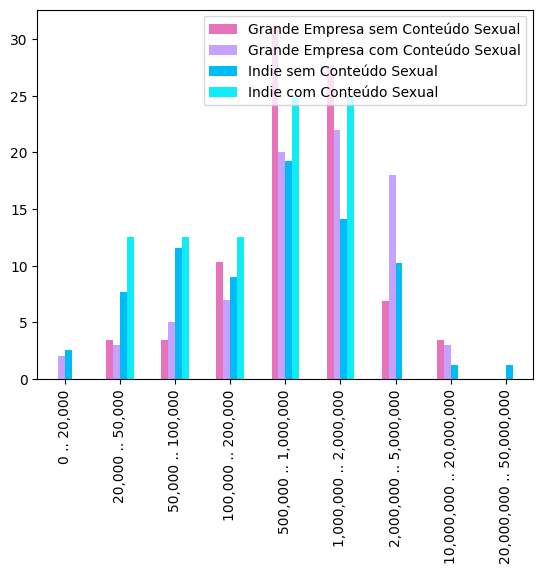

In [25]:
sns.set_palette(['#E773BA', '#C6A1FF', '#00BCF6', '#0FECF6'])
plt.rcParams.update({'font.size': 10})
dadoscategorias.plot(kind='bar')
plt.xlabel('')
plt.savefig('jogadoresportipojogo.pdf', dpi=300, bbox_inches='tight')

**✨(5) Qual a Porcentagem de Avaliação Positiva e Negativa de Jogos da Categoria de Protagonista Feminina em Relação a ter ou não Conteúdo Sexual?**

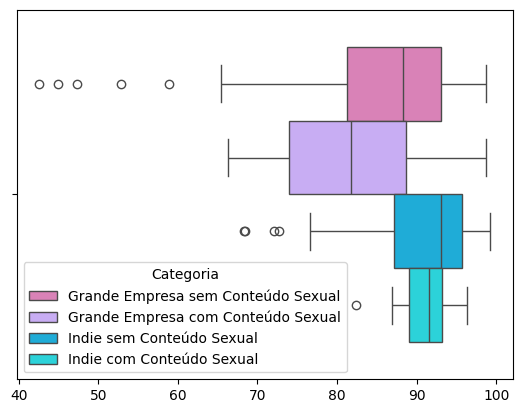

In [26]:
sns.set_palette(['#E773BA', '#C6A1FF', '#00BCF6', '#0FECF6'])
sns.boxplot(data=dados, x="PorcentagemPositivas", hue='Categoria').set(xlabel='')
plt.savefig('boxplotavaliacoespositivas.pdf', dpi=300, bbox_inches='tight')

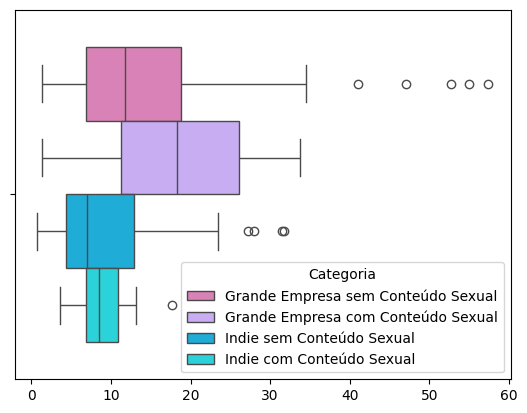

In [27]:
sns.set_palette(['#E773BA', '#C6A1FF', '#00BCF6', '#0FECF6'])
sns.boxplot(data=dados, x="PorcentagemNegativas", hue='Categoria').set(xlabel='')
plt.savefig('boxplotavaliacoesnegativas.pdf', dpi=300, bbox_inches='tight')

In [28]:
# " categoria de protagonista feminina na plataforma steam: categoria inclusiva ou reflexo da sexualização? "

# (1) a quantidade de jogos com conteúdo sexual na categoria de protagonista feminina é relevante?
# --> sim, pois 15% dos jogos tem conteúdo sexual (verificar porcentagem dos jogos fora da categoria)

# (2) dos jogos desenvolvidos na categoria de protagonista feminina, quantos são desenvolvidos por grandes empresas, 
# e quantos são desenvolvidos por empresas indies?
# --> dos 215 jogos, 86 são desenvolvidos por empresas indie, e 129 por grandes empresas

# (3) qual tipo de empresa desenvolve um maior número de jogos com conteúdo sexual na categoria de protagonista feminina?
# -- > grandes empresas com 12%, enquanto as empresas indie tem apenas 3%, apesar de desenvolvedores indies terem um maior número de jogos hentai, 
#      eles não são responsáveis pela maior quantidade de jogos com conteúdo sexual

# (4) os jogos com conteúdo sexual são mais populares do que os sem?
# --> não, tanto de grandes empresas quanto de empresas indies, ambos tem mais jogadores de jogos sem conteúdo sexual

# (5) qual a porcentagem de avaliação positiva e negativa de jogos da categoria de protagonista feminina em relação a ter ou não conteúdo sexual?
# --> a mediana de jogos indie e não indies sem conteúdo sexual é menor em avaliações negativas, e maior em avaliações positivas